<a href="https://colab.research.google.com/github/Lina-ray/amazon-sagemaker-examples/blob/main/Mode_Choice_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pycaret
print(pycaret.__version__)

3.3.2


In [ ]:
from pycaret.classification import setup, compare_models, tune_model, finalize_model, predict_model, save_model
import pandas as pd

# Step 1: Load the dataset
data_file_path = 'londondataset.csv'  # Adjust the path to your dataset
london_data = pd.read_csv(data_file_path)

# Step 2: Define the relevant features and target
target_column = 'travel_mode'
features = [
    'age', 'female', 'driving_license', 'car_ownership', 'distance',
    'dur_walking', 'dur_cycling', 'dur_pt_total', 'dur_driving',
    'cost_transit', 'cost_driving_total', 'driving_traffic_percent'
]

# Filter the dataset
london_data_filtered = london_data[features + [target_column]].dropna()

# Step 3: Initialize PyCaret setup
clf_setup = setup(
    data=london_data_filtered,
    target=target_column,
    session_id=123,
    normalize=True,  # Normalize the data for better performance
    remove_multicollinearity=True,  # Remove highly correlated features
    use_gpu=True  # Use GPU for faster processing if available
)

# Step 4: Compare and select the best model
best_model = compare_models()




[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,travel_mode
2,Target type,Multiclass
3,Target mapping,"cycle: 0, drive: 1, pt: 2, walk: 3"
4,Original data shape,"(81086, 13)"
5,Transformed data shape,"(81086, 10)"
6,Transformed train set shape,"(56760, 10)"
7,Transformed test set shape,"(24326, 10)"
8,Numeric features,12
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7545,0.8986,0.7545,0.7516,0.7428,0.6123,0.6139,11.9290
et,Extra Trees Classifier,0.7487,0.8962,0.7487,0.7405,0.7378,0.6031,0.6049,6.3310
xgboost,Extreme Gradient Boosting,0.7431,0.8932,0.7431,0.7294,0.7305,0.5937,0.5954,3.0620
lightgbm,Light Gradient Boosting Machine,0.7388,0.8916,0.7388,0.7255,0.7266,0.5874,0.5890,2.7130
gbc,Gradient Boosting Classifier,0.7334,0.0000,0.7334,0.7119,0.7203,0.5777,0.5800,41.3160
ada,Ada Boost Classifier,0.7134,0.0000,0.7134,0.6937,0.6992,0.5440,0.5493,2.7970
lr,Logistic Regression,0.7104,0.0000,0.7104,0.6893,0.6985,0.5436,0.5455,1.0600
svm,SVM - Linear Kernel,0.7038,0.0000,0.7038,0.6846,0.6891,0.5279,0.5335,0.6880
lda,Linear Discriminant Analysis,0.6987,0.0000,0.6987,0.6750,0.6792,0.5137,0.5210,0.3620
knn,K Neighbors Classifier,0.6965,0.8414,0.6965,0.6819,0.6863,0.5194,0.5217,1.7130


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# Step 5: Tune the best model for optimal performance
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6905,0.8467,0.6905,0.6698,0.6734,0.5028,0.5074
1,0.6959,0.8511,0.6959,0.6733,0.6811,0.5143,0.5174
2,0.7056,0.8580,0.7056,0.6817,0.6907,0.5305,0.5334
3,0.6986,0.8491,0.6986,0.6754,0.6830,0.5182,0.5215
4,0.6908,0.8450,0.6908,0.6695,0.6760,0.5055,0.5089
5,0.7031,0.8590,0.7031,0.6796,0.6861,0.5240,0.5281
6,0.7081,0.8568,0.7081,0.6841,0.6924,0.5334,0.5368
7,0.6966,0.8523,0.6966,0.6745,0.6806,0.5132,0.5178
8,0.6977,0.8483,0.6977,0.6776,0.6820,0.5145,0.5192


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
# Step 6: Finalize the model
final_model = finalize_model(tuned_model)



In [15]:
# Step 7: Predict on the entire dataset
predictions = predict_model(final_model, data=london_data_filtered)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999


In [16]:

# Step 8: Save the final model and predictions
save_model(final_model, 'final_mode_choice_model')
predictions.to_csv("mode_choice_predictions_pycaret.csv", index=False)


Transformation Pipeline and Model Successfully Saved


In [17]:

# Display feature importance and predictions
print("\nSample Predictions:\n", predictions.head())


Sample Predictions:
    age  female  driving_license  car_ownership  distance  dur_walking  \
0   56       1                1              2       778     0.218056   
1   56       1                1              2       778     0.188889   
2   56       1                1              2      4562     1.037778   
3   56       1                1              2      4562     1.039444   
4   54       0                1              2      4562     1.037778   

   dur_cycling  dur_pt_total  dur_driving  cost_transit  cost_driving_total  \
0     0.092222      0.149444     0.052222           1.5                0.14   
1     0.061944      0.168056     0.059444           1.5                0.15   
2     0.355833      0.412222     0.236667           1.5                0.79   
3     0.384444      0.463611     0.233333           1.5                0.78   
4     0.355833      0.391389     0.229167           1.5                0.78   

   driving_traffic_percent travel_mode prediction_label  predict

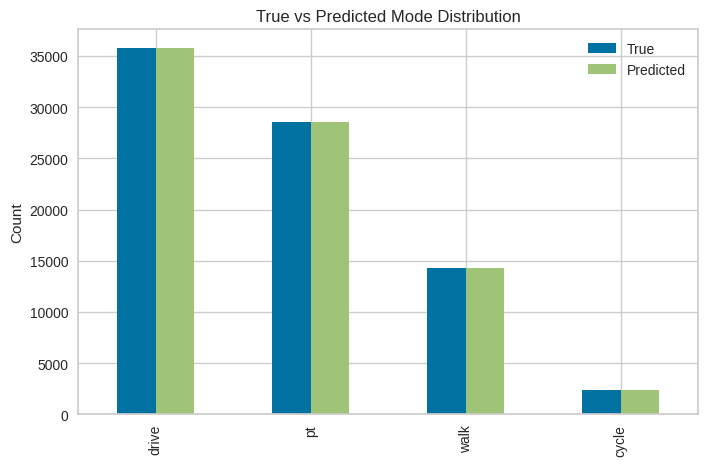

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count true and predicted modes
true_counts = predictions['travel_mode'].value_counts()
predicted_counts = predictions['prediction_label'].value_counts()

# Plot
df_counts = pd.DataFrame({'True': true_counts, 'Predicted': predicted_counts})
df_counts.plot(kind='bar', figsize=(8, 5))
plt.title("True vs Predicted Mode Distribution")
plt.ylabel("Count")
plt.show()


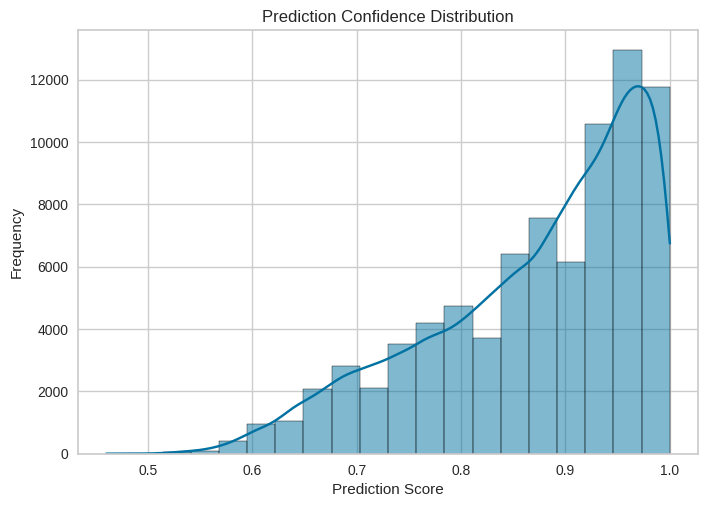

In [23]:
sns.histplot(predictions['prediction_score'], kde=True, bins=20)
plt.title("Prediction Confidence Distribution")
plt.xlabel("Prediction Score")
plt.ylabel("Frequency")
plt.show()

In [26]:
y_true = predictions['travel_mode']
y_pred = predictions['prediction_label']


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)  # Replace y_true and y_pred with your variables
labels = predictions['travel_mode'].unique()  # Replace with actual class labels


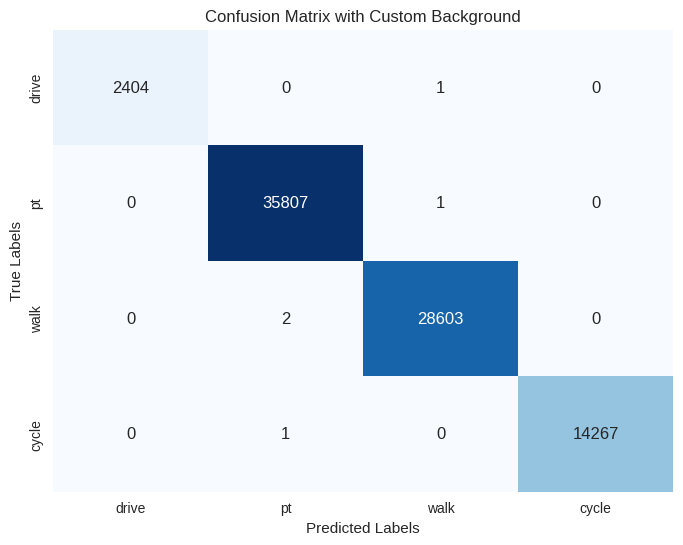

In [32]:
# Create a heatmap with custom background colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title("Confusion Matrix with Custom Background")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
